In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
Train_Data = pd.read_csv('Encoded_Train_Data.csv')
Val_Data = pd.read_csv('Encoded_Val_Data.csv') 
Test_Data = pd.read_csv('Encoded_Test_Data.csv') 

In [3]:
Train_Data.columns


Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Educational_Level',
       'Income', 'Expected_checkin', 'Expected_checkout', 'Booking_date',
       'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Days_plan_to_stay', 'checkin_year',
       'checkin_month', 'checkin_day', 'checkin_day_of_the_week',
       'Days_until_checkin', 'Booking_month', 'Booking_day_of_the_week',
       'Min_num_of_rooms', 'Total_Min_Cost', 'Min_Discount_amo

In [4]:
Continus = ['Age','Discount_Rate','Room_Rate','checkin_year','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms',
            'Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Min Value'] = list(Train_Data.min(axis=0))
    summary['Max Value'] = list(Train_Data.max(axis=0))
    return summary

resumetable(Train_Data)

Dataset Shape: (27499, 46)


,Name,dtypes,Missing,Uniques,Min Value,Max Value
0,Unnamed: 0,int64,0,27499,0,27498
1,Reservation-id,int64,0,27495,3154,99999005
2,Gender,int64,0,2,0,1
3,Age,int64,0,53,18,70
4,Educational_Level,int64,0,4,0,3
5,Income,int64,0,4,0,3
6,Expected_checkin,object,0,901,2014-11-18,2017-09-06
7,Expected_checkout,object,0,929,2014-11-22,2017-09-09
8,Booking_date,object,0,1133,2014-01-09,2017-08-30
9,Adults,int64,0,5,1,5


In [30]:
from catboost import CatBoostClassifier

Continus = ['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

Classifier = CatBoostClassifier(random_state=435,fold_permutation_block=5,
                                class_weights = (1-(10000/27499),3-(2000/27499),5-(100/27499)))
X_train = Train_Data.loc[:,Categorical+Continus]
Y_train = Train_Data.loc[:,Label]

Classifier.fit(X_train, Y_train)

Learning rate set to 0.093698
0:	learn: 1.0897421	total: 7.27ms	remaining: 7.26s
1:	learn: 1.0829537	total: 13.7ms	remaining: 6.82s
2:	learn: 1.0761352	total: 20.3ms	remaining: 6.74s
3:	learn: 1.0712004	total: 27.1ms	remaining: 6.76s
4:	learn: 1.0667246	total: 34.3ms	remaining: 6.82s
5:	learn: 1.0633646	total: 41.2ms	remaining: 6.83s
6:	learn: 1.0598279	total: 48.1ms	remaining: 6.82s
7:	learn: 1.0571935	total: 55.3ms	remaining: 6.85s
8:	learn: 1.0549733	total: 61.8ms	remaining: 6.8s
9:	learn: 1.0520430	total: 69.1ms	remaining: 6.84s
10:	learn: 1.0496786	total: 75.7ms	remaining: 6.8s
11:	learn: 1.0480784	total: 81.9ms	remaining: 6.75s
12:	learn: 1.0460144	total: 89ms	remaining: 6.75s
13:	learn: 1.0441143	total: 96.1ms	remaining: 6.76s
14:	learn: 1.0426271	total: 102ms	remaining: 6.73s
15:	learn: 1.0417849	total: 109ms	remaining: 6.72s
16:	learn: 1.0407332	total: 116ms	remaining: 6.72s
17:	learn: 1.0394502	total: 123ms	remaining: 6.73s
18:	learn: 1.0380489	total: 131ms	remaining: 6.75s
1

181:	learn: 0.9249520	total: 1.26s	remaining: 5.67s
182:	learn: 0.9242009	total: 1.27s	remaining: 5.67s
183:	learn: 0.9236297	total: 1.27s	remaining: 5.66s
184:	learn: 0.9231698	total: 1.28s	remaining: 5.65s
185:	learn: 0.9224646	total: 1.29s	remaining: 5.64s
186:	learn: 0.9219939	total: 1.3s	remaining: 5.64s
187:	learn: 0.9212156	total: 1.3s	remaining: 5.63s
188:	learn: 0.9204455	total: 1.31s	remaining: 5.62s
189:	learn: 0.9197392	total: 1.32s	remaining: 5.62s
190:	learn: 0.9194319	total: 1.32s	remaining: 5.61s
191:	learn: 0.9187205	total: 1.33s	remaining: 5.6s
192:	learn: 0.9181045	total: 1.34s	remaining: 5.59s
193:	learn: 0.9175000	total: 1.34s	remaining: 5.59s
194:	learn: 0.9170567	total: 1.35s	remaining: 5.58s
195:	learn: 0.9164885	total: 1.36s	remaining: 5.57s
196:	learn: 0.9158846	total: 1.36s	remaining: 5.57s
197:	learn: 0.9152824	total: 1.37s	remaining: 5.55s
198:	learn: 0.9145366	total: 1.38s	remaining: 5.55s
199:	learn: 0.9137314	total: 1.39s	remaining: 5.54s
200:	learn: 0.9

366:	learn: 0.8284964	total: 2.53s	remaining: 4.36s
367:	learn: 0.8280835	total: 2.54s	remaining: 4.36s
368:	learn: 0.8274787	total: 2.54s	remaining: 4.35s
369:	learn: 0.8269947	total: 2.55s	remaining: 4.34s
370:	learn: 0.8265530	total: 2.56s	remaining: 4.33s
371:	learn: 0.8260069	total: 2.56s	remaining: 4.33s
372:	learn: 0.8256219	total: 2.57s	remaining: 4.32s
373:	learn: 0.8249624	total: 2.58s	remaining: 4.31s
374:	learn: 0.8244383	total: 2.58s	remaining: 4.31s
375:	learn: 0.8240680	total: 2.59s	remaining: 4.3s
376:	learn: 0.8236678	total: 2.6s	remaining: 4.29s
377:	learn: 0.8232894	total: 2.61s	remaining: 4.29s
378:	learn: 0.8228302	total: 2.61s	remaining: 4.28s
379:	learn: 0.8224295	total: 2.62s	remaining: 4.28s
380:	learn: 0.8219262	total: 2.63s	remaining: 4.27s
381:	learn: 0.8213709	total: 2.63s	remaining: 4.26s
382:	learn: 0.8208442	total: 2.64s	remaining: 4.25s
383:	learn: 0.8203676	total: 2.65s	remaining: 4.25s
384:	learn: 0.8198131	total: 2.65s	remaining: 4.24s
385:	learn: 0.

549:	learn: 0.7502749	total: 3.79s	remaining: 3.1s
550:	learn: 0.7497686	total: 3.8s	remaining: 3.1s
551:	learn: 0.7494251	total: 3.81s	remaining: 3.09s
552:	learn: 0.7490395	total: 3.82s	remaining: 3.08s
553:	learn: 0.7487939	total: 3.82s	remaining: 3.08s
554:	learn: 0.7484249	total: 3.83s	remaining: 3.07s
555:	learn: 0.7479826	total: 3.84s	remaining: 3.06s
556:	learn: 0.7473443	total: 3.84s	remaining: 3.06s
557:	learn: 0.7470958	total: 3.85s	remaining: 3.05s
558:	learn: 0.7467978	total: 3.86s	remaining: 3.04s
559:	learn: 0.7463431	total: 3.87s	remaining: 3.04s
560:	learn: 0.7459678	total: 3.87s	remaining: 3.03s
561:	learn: 0.7455255	total: 3.88s	remaining: 3.02s
562:	learn: 0.7452230	total: 3.89s	remaining: 3.02s
563:	learn: 0.7448114	total: 3.89s	remaining: 3.01s
564:	learn: 0.7445402	total: 3.9s	remaining: 3s
565:	learn: 0.7442011	total: 3.91s	remaining: 3s
566:	learn: 0.7438791	total: 3.92s	remaining: 2.99s
567:	learn: 0.7432417	total: 3.92s	remaining: 2.98s
568:	learn: 0.7429041	

726:	learn: 0.6847369	total: 5.06s	remaining: 1.9s
727:	learn: 0.6841949	total: 5.07s	remaining: 1.89s
728:	learn: 0.6838492	total: 5.07s	remaining: 1.89s
729:	learn: 0.6833828	total: 5.08s	remaining: 1.88s
730:	learn: 0.6830968	total: 5.09s	remaining: 1.87s
731:	learn: 0.6827084	total: 5.09s	remaining: 1.86s
732:	learn: 0.6823476	total: 5.1s	remaining: 1.86s
733:	learn: 0.6821176	total: 5.11s	remaining: 1.85s
734:	learn: 0.6817558	total: 5.12s	remaining: 1.84s
735:	learn: 0.6815390	total: 5.12s	remaining: 1.84s
736:	learn: 0.6812125	total: 5.13s	remaining: 1.83s
737:	learn: 0.6808447	total: 5.14s	remaining: 1.82s
738:	learn: 0.6805738	total: 5.14s	remaining: 1.82s
739:	learn: 0.6802331	total: 5.15s	remaining: 1.81s
740:	learn: 0.6799013	total: 5.16s	remaining: 1.8s
741:	learn: 0.6795336	total: 5.17s	remaining: 1.8s
742:	learn: 0.6791583	total: 5.17s	remaining: 1.79s
743:	learn: 0.6787487	total: 5.18s	remaining: 1.78s
744:	learn: 0.6783446	total: 5.19s	remaining: 1.77s
745:	learn: 0.67

907:	learn: 0.6286438	total: 6.33s	remaining: 641ms
908:	learn: 0.6284595	total: 6.34s	remaining: 634ms
909:	learn: 0.6281006	total: 6.34s	remaining: 627ms
910:	learn: 0.6277018	total: 6.35s	remaining: 620ms
911:	learn: 0.6275699	total: 6.36s	remaining: 613ms
912:	learn: 0.6272795	total: 6.36s	remaining: 606ms
913:	learn: 0.6270587	total: 6.37s	remaining: 600ms
914:	learn: 0.6266042	total: 6.38s	remaining: 593ms
915:	learn: 0.6264384	total: 6.38s	remaining: 586ms
916:	learn: 0.6260599	total: 6.39s	remaining: 578ms
917:	learn: 0.6258119	total: 6.4s	remaining: 572ms
918:	learn: 0.6256342	total: 6.41s	remaining: 565ms
919:	learn: 0.6253706	total: 6.41s	remaining: 558ms
920:	learn: 0.6251897	total: 6.42s	remaining: 551ms
921:	learn: 0.6248621	total: 6.42s	remaining: 544ms
922:	learn: 0.6246407	total: 6.43s	remaining: 537ms
923:	learn: 0.6243392	total: 6.44s	remaining: 530ms
924:	learn: 0.6239855	total: 6.45s	remaining: 523ms
925:	learn: 0.6237060	total: 6.45s	remaining: 516ms
926:	learn: 0

0.772391723335394


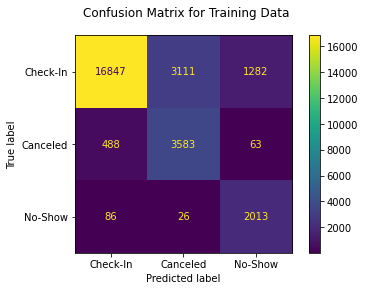

              precision    recall  f1-score   support

    Check-In       0.97      0.79      0.87     21240
    Canceled       0.53      0.87      0.66      4134
     No-Show       0.60      0.95      0.73      2125

    accuracy                           0.82     27499
   macro avg       0.70      0.87      0.76     27499
weighted avg       0.87      0.82      0.83     27499



In [31]:
Y_train_predict = Classifier.predict(X_train)[:,0]

print(Classifier.score(Y_train_predict, Y_train))
fig=plot_confusion_matrix(Classifier, X_train,Y_train,
display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_train, Y_train_predict, target_names=target_names))

0.5856675154601674


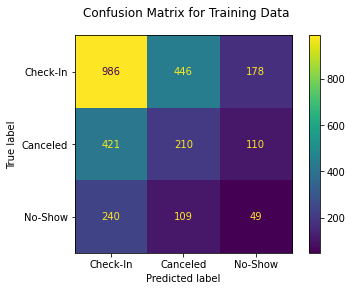

              precision    recall  f1-score   support

    Check-In       0.60      0.61      0.61      1610
    Canceled       0.27      0.28      0.28       741
     No-Show       0.15      0.12      0.13       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.45      0.45      2749



In [32]:
X_val = Val_Data.loc[:,Categorical+Continus]
Y_val = Val_Data.loc[:,Label]

Y_val_predict = Classifier.predict(X_val)[:,0]

print(Classifier.score(Y_val_predict, Y_val))
fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_val, Y_val_predict, target_names=target_names))

In [33]:
X_Test = Test_Data.loc[:,Categorical+Continus]
# Y_val = Test_Data.loc[:,Label]

Test_Data_predict = Classifier.predict(X_Test)[:,0]

Test_Data["Reservation_Status"] = Test_Data_predict

# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(3,'No-Show')
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(2,"Canceled")
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(1,"Check-In")

Submission = Test_Data.loc[:,["Reservation-id","Reservation_Status"]]
Submission.to_csv("Submission Model-1 Catboost.csv",index=False)
Submission

,Reservation-id,Reservation_Status
0,62931593,1
1,70586099,2
2,4230648,1
3,25192322,2
4,80931528,1
...,...,...
4313,39110574,3
4314,5496554,1
4315,59004046,2
4316,65838682,1


In [39]:
import lime
import lime.lime_tabular

X_val = Val_Data.loc[:,Categorical+Continus]
Y_val = Val_Data.loc[:,Label]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_val),
                    feature_names=Categorical+Continus, 
                    class_names=[Label], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

Intercept 1.0377856828049503
Prediction_local [2.11909546]
Right: 2


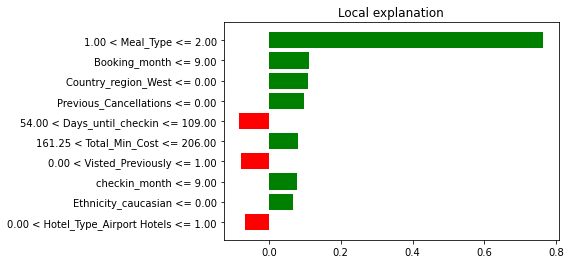

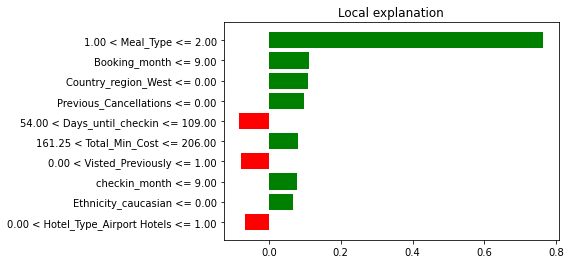

In [40]:
exp = explainer.explain_instance(X_val.iloc[3], Classifier.predict)
exp.as_pyplot_figure()

Intercept 1.5159731151856746
Prediction_local [1.18824855]
Right: 2


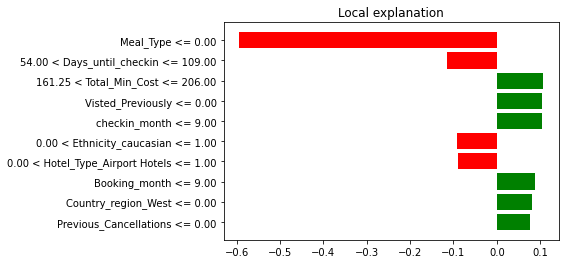

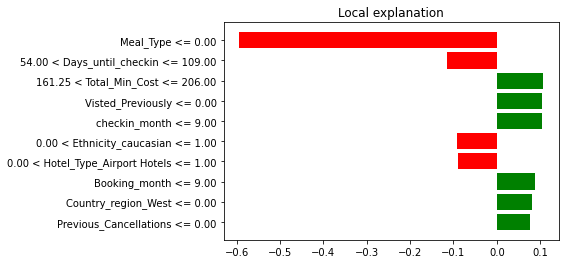

In [46]:
exp = explainer.explain_instance(X_val.iloc[1545], Classifier.predict)
exp.as_pyplot_figure()

In [44]:
X_val

,Gender,Educational_Level,Income,Meal_Type,Visted_Previously,Previous_Cancellations,Use_Promotion,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,...,Room_Rate,checkin_month,Adults,Children,Babies,Days_until_checkin,Booking_month,Min_num_of_rooms,Total_Min_Cost,Min_Discount_amount
0,1,3,0,1,0,0,1,0,0,0,...,192,8,2,2,0,195.0,8,1.0,172.80,19.20
1,1,2,1,2,1,0,0,0,0,1,...,187,8,2,2,0,175.0,8,1.0,187.00,0.00
2,0,2,0,2,0,0,1,0,1,0,...,227,9,3,1,0,193.0,9,1.0,227.00,0.00
3,0,2,1,2,1,0,1,0,0,1,...,189,8,1,2,0,103.0,8,1.0,179.55,9.45
4,0,2,1,1,1,0,1,0,1,0,...,218,8,1,1,0,92.0,8,1.0,196.20,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,0,2,2,0,1,0,1,0,0,0,...,199,11,5,1,1,37.0,11,2.0,298.50,99.50
2745,0,2,1,2,0,0,1,0,0,0,...,106,12,3,2,0,154.0,12,1.0,90.10,15.90
2746,1,3,1,2,0,0,1,0,1,0,...,136,11,2,3,0,30.0,11,1.0,115.60,20.40
2747,1,2,0,1,1,1,1,0,1,0,...,226,11,5,1,0,170.0,11,2.0,452.00,0.00


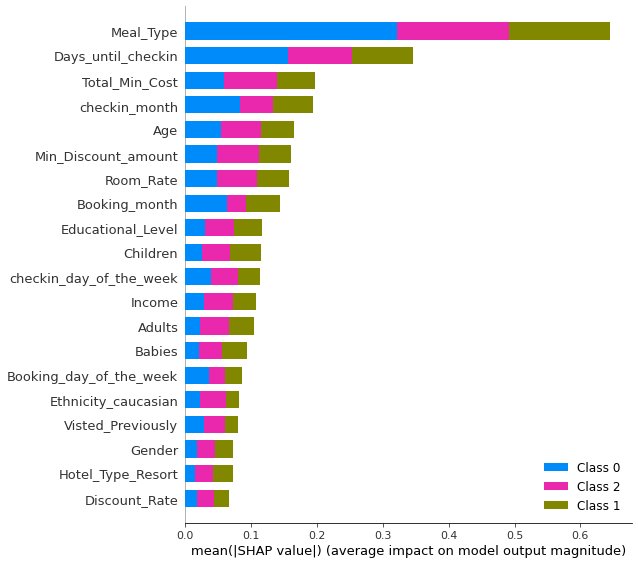

In [37]:
import shap
explainer = shap.TreeExplainer(Classifier)
X_val = Val_Data.loc[:,Categorical+Continus]
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)